<h1> Taking Wine dataset

In [1]:
import requests

def takeData(url, saveDir):
  request = requests.get(url)
  with open(saveDir, mode="wb") as archive:
    archive.write(request.content)
    print(f"Donwload concluido, salvo em {saveDir}")
  
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
takeData(DATA_URL, "Wine_dataset.csv")

Donwload concluido, salvo em Wine_dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("Wine_dataset.csv", header=None)
X = df.iloc[:,1:14]
y = df.iloc[:, 0]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<h1> Tuning Machine Learning Model with "sklearn-deap"



In [3]:
!pip install deap
!pip install sklearn-deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# The model that we will tune is AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from evolutionary_search import EvolutionaryAlgorithmSearchCV
import random
import numpy as np
import time

# CONTROL PANEL
RANDOM_SEED = 42
SPLIT_DATA_NUMBER = 5
random.seed(RANDOM_SEED)


# MODEL AND PARAMETERS
model_ada = AdaBoostClassifier(random_state=RANDOM_SEED)
data_splitter = KFold(n_splits=SPLIT_DATA_NUMBER)
grid_parameters = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': np.logspace(-2, 0, num=10, base=10),
    'algorithm': ['SAMME', 'SAMME.R'],
    }


# FITNESS FUNCTION
def normal_accuracy(MODEL, DATA_SPLITTER):
  global X, y
  cv_scores = cross_val_score(MODEL, X, y, cv=DATA_SPLITTER, scoring="accuracy")
  return cv_scores.mean()


# TUNING FUNCTIONS
def gridTest(MODEL, DATA_SPLITTER, PARAMETERS):
  print("performing grid search...")

  gridSearch = GridSearchCV(estimator= MODEL,
                            param_grid= PARAMETERS,
                            cv= DATA_SPLITTER,
                            scoring='accuracy',
                            n_jobs=6)

  gridSearch.fit(X, y)
  print("best parameters: ", gridSearch.best_params_)
  print("best score: ", gridSearch.best_score_)

def geneticGridTest(MODEL, DATA_SPLITTER, PARAMETERS):
  print("performing Genetic grid search...")

  gridSearch = EvolutionaryAlgorithmSearchCV(estimator=MODEL,
                                              params=PARAMETERS,
                                              cv=DATA_SPLITTER,
                                              scoring='accuracy',
                                              verbose=True,
                                              n_jobs=6,
                                              population_size=20,
                                              gene_mutation_prob=0.30,
                                              gene_crossover_prob=0.50,
                                              tournament_size=2,
                                              generations_number=5)
  gridSearch.fit(X, y)

# TUNING
print("Default Hyperparameters of model")
print(model_ada.get_params())
print(f"Score with default hyperparameters: {normal_accuracy(model_ada, data_splitter)}\n")

print("Tunning the model with conventional gridsearch")
start = time.time()
gridTest(model_ada, data_splitter, grid_parameters)
end = time.time()
print(f"It taked {end - start}\n")

start = time.time()
geneticGridTest(model_ada, data_splitter, grid_parameters)
end = time.time()
print(f"It taked {end - start}\n")

Default Hyperparameters of model
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 42}
Score with default hyperparameters: 0.6457142857142857

Tunning the model with conventional gridsearch
performing grid search...
best parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.3593813663804626, 'n_estimators': 70}
best score:  0.9322222222222223
It taked 105.8498158454895

performing Genetic grid search...
Types [1, 2, 1] and maxint [9, 9, 1] detected
--- Evolve in 200 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	20    	0.708427	0.117978	0.910112	0.265992
1  	13    	0.865169	0.662921	0.926966	0.0717915
2  	15    	0.887921	0.646067	0.926966	0.0571676
3  	12    	0.896348	0.679775	0.926966	0.0526256
4  	16    	0.918539	0.88764 	0.926966	0.0110233
5  	9     	0.911517	0.730337	0.926966	0.0425958
Best individual is: {'n_estimators': 60, 'learning_rate': 0.5994842503189409, 'algorithm': 'SAMME.R'}
with fi

<h1> Trying to improve the result with a genetic algorithms real-coded

In [5]:
# Now we will create a genetic algorithm that can optimize more our tunning
# using a real-coded gene to represent our hyperparameters
# The hyperparameters are: 'n_estimators'(10 - 100); 'learning_rate': (10**-2 - 10**0); 'algorithm': ('SAMME', 'SAMME.R'),


# CONTROL PANEL
BOUNDS_LOW = [ 1, 0.01, 0] # [n_estimators, learning_rate, algorithm]
BOUNDS_HIGH = [100, 1.00, 1] # [n_estimators, learning_rate, algorithm]


In [6]:
from deap import creator, base, tools, algorithms
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import random
import numpy as np

# MACHINE LEARNING
data_splitter = KFold(n_splits=SPLIT_DATA_NUMBER)


# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = len(BOUNDS_HIGH)
def gene(a,b):
  return random.uniform(a,b)
genes = ()
for i in range(CHROMOSOME_LENGTH):
  toolbox.register(f"Gene_{i}", gene, a=BOUNDS_LOW[i], b=BOUNDS_HIGH[i])
  genes += (toolbox.__getattribute__(f"Gene_{i}"),)
toolbox.register("Chromosome", tools.initCycle, creator.ChromosomeStruct, genes, n=1)
toolbox.register("Individual", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS 
def convertGenesInParameters(solution):
  params = []
  params.append(round(solution[0]))  # First gene, n_estimators
  params.append(solution[1])  # Second gene, learning_rate
  params.append(['SAMME', 'SAMME.R'][round(solution[2])])  # Third gene, algorithm
  return params
def fitness_function(solution, DATA_SPLITTER):
  global RANDOM_SEED, X, y
  params = convertGenesInParameters(solution)
  MODEL = AdaBoostClassifier(n_estimators=params[0], learning_rate=params[1], algorithm=params[2], random_state=RANDOM_SEED)
  cv_scores = cross_val_score(MODEL, X, y, cv=DATA_SPLITTER, scoring="accuracy")
  return cv_scores.mean(),
ETA = 20
toolbox.register("evaluate", fitness_function, DATA_SPLITTER=data_splitter)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=ETA, indpb=1.5/CHROMOSOME_LENGTH)


# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)


# CONTROL PANEL
POPULATION_SIZE = 20
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 10 # (stopping condition)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = algorithms.eaSimple(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max    	min     	mean    
0  	20    	0.92127	0.618254	0.868397
1  	17    	0.92127	0.846508	0.896   
2  	17    	0.943651	0.887619	0.911881
3  	17    	0.926984	0.869841	0.908468
4  	15    	0.92127 	0.806667	0.909548
5  	14    	0.926825	0.829683	0.910651
6  	19    	0.926984	0.898254	0.919413
7  	20    	0.932222	0.886667	0.918008
8  	20    	0.937937	0.89873 	0.922246
9  	18    	0.937937	0.910317	0.925571
10 	17    	0.932381	0.85254 	0.918198


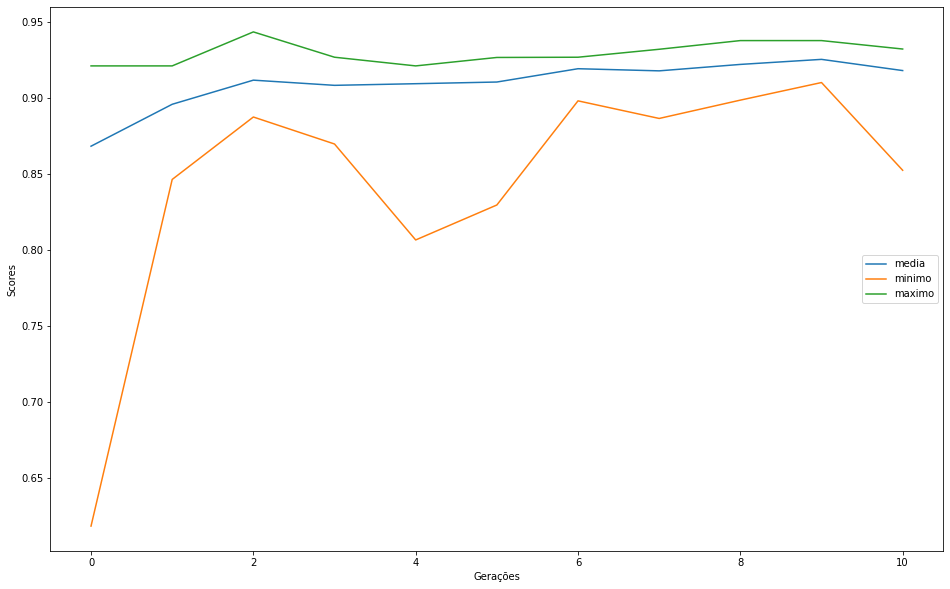

In [7]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_max = logbook.select("max")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [8]:
convertGenesInParameters(hof[0])

[69, 0.6322776992170188, 'SAMME.R']

<h1> Trying to improve the result with elitims

In [9]:
from deap import tools
from deap import algorithms

def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [10]:
from deap import creator, base, tools, algorithms
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import random
import numpy as np

# MACHINE LEARNING
data_splitter = KFold(n_splits=SPLIT_DATA_NUMBER)


# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("ChromosomeStruct", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# GENE, CHROMOSOME, INDIVIDUAL, POPULATION
CHROMOSOME_LENGTH = len(BOUNDS_HIGH)
def gene(a,b):
  return random.uniform(a,b)
genes = ()
for i in range(CHROMOSOME_LENGTH):
  toolbox.register(f"Gene_{i}", gene, a=BOUNDS_LOW[i], b=BOUNDS_HIGH[i])
  genes += (toolbox.__getattribute__(f"Gene_{i}"),)
toolbox.register("Chromosome", tools.initCycle, creator.ChromosomeStruct, genes, n=1)
toolbox.register("Individual", toolbox.Chromosome)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.Individual)


# GENETIC OPERATORS 
def convertGenesInParameters(solution):
  params = []
  params.append(round(solution[0]))  # First gene, n_estimators
  params.append(solution[1])  # Second gene, learning_rate
  params.append(['SAMME', 'SAMME.R'][round(solution[2])])  # Third gene, algorithm
  return params
def fitness_function(solution, DATA_SPLITTER):
  global RANDOM_SEED, X, y
  params = convertGenesInParameters(solution)
  MODEL = AdaBoostClassifier(n_estimators=params[0], learning_rate=params[1], algorithm=params[2], random_state=RANDOM_SEED)
  cv_scores = cross_val_score(MODEL, X, y, cv=DATA_SPLITTER, scoring="accuracy")
  return cv_scores.mean(),
ETA = 30
toolbox.register("evaluate", fitness_function, DATA_SPLITTER=data_splitter)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUNDS_LOW, up=BOUNDS_HIGH, eta=ETA, indpb=1.5/CHROMOSOME_LENGTH)


# STORING THE INFORMATION
stats = tools.Statistics(lambda population: population.fitness.values)
stats.register("max", np.max)
stats.register("min", np.min)
stats.register("mean", np.mean)
hof = tools.HallOfFame(5)


# CONTROL PANEL
POPULATION_SIZE = 20
PROBABILITY_CROSSOVER = 0.8
PROBABILITY_MUTATION = 0.2
MAX_GENERATIONS = 10 # (stopping condition)


# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, logbook = eaSimpleWithElitism(population,
                                      toolbox,
                                      cxpb=PROBABILITY_CROSSOVER,
                                      mutpb=PROBABILITY_MUTATION,
                                      ngen=MAX_GENERATIONS,
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'ChromosomeStruct' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	max     	min     	mean    
0  	20    	0.921111	0.153016	0.814222
1  	12    	0.921111	0.880635	0.902905
2  	14    	0.921111	0.881111	0.907222
3  	14    	0.926508	0.904286	0.913373
4  	11    	0.926667	0.886825	0.918238
5  	12    	0.932222	0.875714	0.914476
6  	10    	0.932222	0.875714	0.917325
7  	14    	0.932222	0.898254	0.922413
8  	13    	0.932222	0.886984	0.920103
9  	13    	0.932222	0.886984	0.920349
10 	15    	0.937937	0.909206	0.92573 


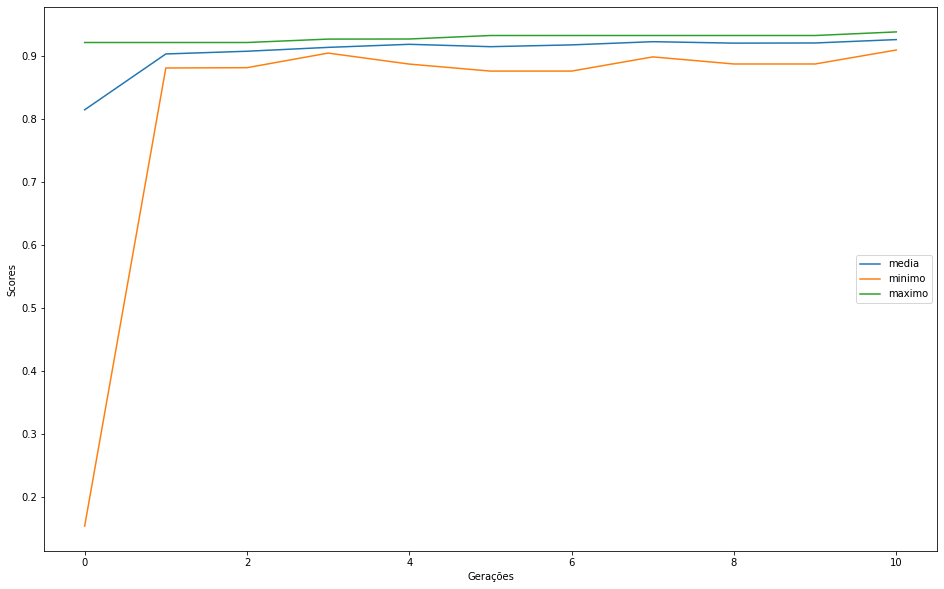

In [11]:
import matplotlib.pyplot as plt

# taking data
y_min = logbook.select("min")
y_max = logbook.select("max")
y_mean = logbook.select("mean")
x_gen = logbook.select("gen")


#plotting
plt.figure(figsize=(16,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="minimo")
plt.plot(x_gen, y_max, label="maximo")


plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=5)
plt.show()

In [12]:
convertGenesInParameters(hof[0])

[41, 0.8655317429893205, 'SAMME.R']